$\DeclareMathOperator{\d}{d}$
$\newcommand{\err}[3]{\Delta #1 =& #1\cdot\sqrt{\lr{\frac{\Delta #2}{#2}}^2 + \lr{\frac{\Delta #3}{#3}}^2}}$
$\newcommand{\lr}[1]{\left(#1\right)}$

# Protokoll PAP2 Versuch 256: Röntgenfloureszenz
Leonard Scheuer

## Motivation
In diesem Versuch wollen wir die Energien der der $K_\alpha$ und $K_\beta$-Strahlung einiger Elemente bestimmen und schließlich auch umgekehrt Materialzusammensetzungen aus den Spektren bestimmen. Auch soll die Vorhersage des Mosley'schen Gesetzes damit überprüft werden. 

## Grundlagen
### Röntgenfloureszenz
Wird Materie mit Röntgenstrahlung bestrahlt, so können manche Elektronen auf inneren Schalen (wir nutzen hier vereinfachend das Schalenmodell) herausgeschlagen werden, sodass höherenergetische Elektronen unter Abgabe eines Lichtquants nachrücken. Die Übergangsgrößen sind dabei charakteristisch für das Element. Die verschiedenen möglichen Übergänge für ein allgemeines Atom sind in der nachfolgenden Abbildung dargestellt.

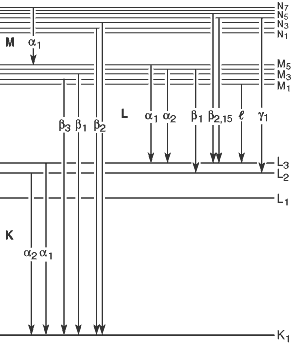

Abb. 1: Elektische Übergänge in einem Atom. (Quelle: [X-Ray Data Booklet](https://xdb.lbl.gov))

Aus dem Bohrschen Atommodell lassen sich die jeweiligen Energiegrößen näherungsweise herleiten, man erhält:
\begin{equation}
\Delta E=E_{2}-E_{1}=\operatorname{ch} R_{\infty}\left(\frac{\left(Z-\sigma_{n_{1}}\right)^{2}}{n_{1}^{2}}-\frac{\left(Z-\sigma_{n_{2}}\right)^{2}}{n_{2}^{2}}\right)
\end{equation}
wobei $Z$ die Kernaldungszahl. $R_{\infty}$ die Rydbergkonstante und Die $\sigma_i$ die sog. Abschirmungskonstanten sind, welche die Abschirmungswirkung weiterer Hüllenelektronen auf den Kern miteinbeziehen. Wir führen vereinfachend eine mittlere Abschirmungskonstante $\sigma_{12}$ ein, die obige Beziehung vereinfacht sich so zu
\begin{equation}
\Delta E=E_{2}-E_{1}=\operatorname{ch} R_{\infty}(Z-\sigma 12)^{2}\left(\frac{1}{n_{1}^{2}}-\frac{1}{n_{2}^{2}}\right)
\end{equation}
Mit der Rydberg-Energie $E_R=chR_\infty$ findet man schließlich das **Mosleysche Gesetz**:
\begin{equation}
\Delta E=E_{2}-E_{1}=\operatorname{ch} R_{\infty}(Z-\sigma 12)^{2}\left(\frac{1}{n_{1}^{2}}-\frac{1}{n_{2}^{2}}\right)
\end{equation}
Für $K_\alpha$ kann bei nicht zu schweren Kernen ($Z<30$) $\sigma_{12} \approx 1$ angenommen werden.
Wir erhalten für diesen Fall:
\begin{equation}
\Delta E=E_{2}-E_{1}=\operatorname{ch} R_{\infty}(Z-\sigma 12)^{2}\left(\frac{1}{n_{1}^{2}}-\frac{1}{n_{2}^{2}}\right)
\end{equation}

### Röntgenenergiedetektor

Um die oben beschriebenen Energien messen zu können, müssen die Energien der abgegebenen Photonen gemessen werden. Dafür wird eine PIN-Diode verwendet, im gegensatz zu einer gewöhnlichen pn-Diode besitzt diese noch eine undotierte Halbleiterschicht zwischen den dotierten. 

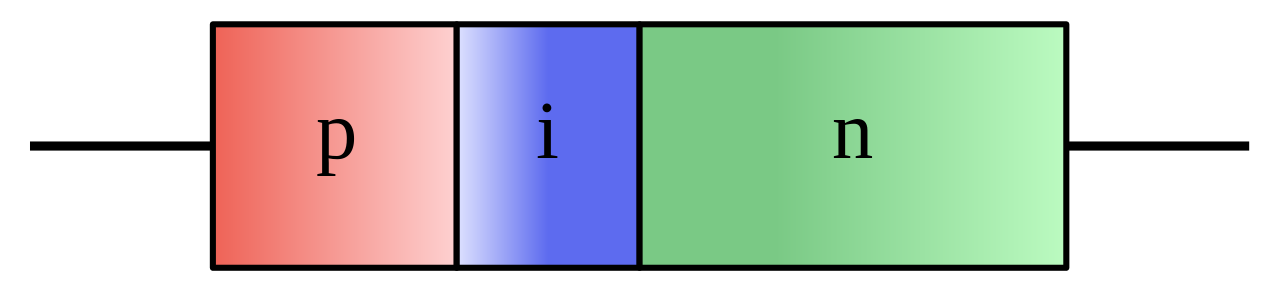
Abb. 2: PIN-Diode (Quelle: [Wikipedia](https://en.wikipedia.org/wiki/PIN_diode#/media/File:Pin-Diode.svg))

Wir betreiben die Diode in Sperrichtung, trifft nun ein Photon in die Undotierte Zone, so bilden sich daraus Loch-Elektron-Paare aus, wessen komponenten in etgegengesetzte Richtungen "abgesaugt" werden. Die dabei feiwerdene Ladung ist proportinal zur Energie. 

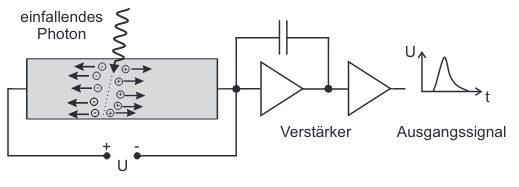
Abb. 4: Funktionsprinzip des Röntgenenergiedetektors (Quelle: [Script](https://www.physi.uni-heidelberg.de/Einrichtungen/AP/info/Corona/PAP22_Elektr_Radioak_0419.pdf#page=101))

Die genergierten Impulse werden mit dem Vielkanalanalysator ausgewertet. Die Energiekalibrierung findet in diesem Versuch mit Eisen und Molybdän statt.

## Material
- Röntgengerät mit Röntgenröhre
- Röntgeneneriedetektor
- Vielkanalanalysator
- Metallproben

## Durchführung

1. Alle Metallplätchen werden vermessen
2. Die Energiekallibrierung (s.o.) wird durchgeführt und mit dem programmeigenen Gausfitt die Mittelwerte und Peakbreiten der $K_\alpha$ und $K_\beta$-Linien aufgenommen.

Technische Feinheiten des Vorgehens können dem [Script](https://www.physi.uni-heidelberg.de/Einrichtungen/AP/info/Corona/PAP22_Elektr_Radioak_0419.pdf#page=102) entnommen werden. 

## Messdaten

![Messdaten](./Screenshot.png)

Metallplätchen

![Messdaten1](./1.png)
Legierung 1: Cr Fe Ni

![Messdaten2](./2_Cu_Zn.png)
Legierung 2: Cu Zn

![Messdaten1](./3_pulver.png)
Legierung 3: Pulver

![Messdaten1](./4_hell_FeZn.png)
Legierung 4: Fe Zn

![Messdaten1](./Münze.png)
Legierung 5: Münze

## Auswertung

Wir tragen wir $E_\alpha$ und fitten eine Funktion der Form von Gl. (2) an, wobei $n_1=1$ und $n_2=2$. Wir geben die Fitparameter aus und prüfen die Abweichung der Rydbergenergie zum Literaturwert.

In [ ]:
#Initialisierung
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.stats import chi2

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

def fit_func(x, Er, sig12):
    return Er * (x - sig12)**2 * (1 / n1**2 - 1 / n2**2)

Z, mu1, mu1_err, mu2, mu2_err = np.genfromtxt("v1.csv", delimiter = ';', skip_header = 2, converters = {1:comma_to_float, 2:comma_to_float, 3:comma_to_float, 6:comma_to_float, 7:comma_to_float}, unpack = True, usecols = [1, 2, 3, 6, 7])

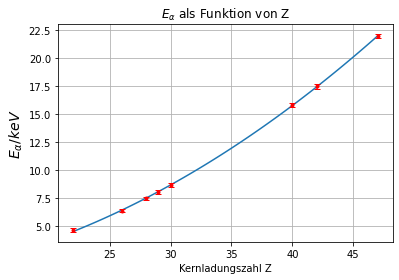

In [6]:
n1 = 1
n2 = 2

zs = np.linspace(22, 47 , 100)

popt, pcov = curve_fit(fit_func, Z, mu1, sigma = mu1_err)
plt.plot(zs, fit_func(zs, *popt))

plt.errorbar(Z, mu1, mu1_err, fmt = "r.", capsize = 3)

plt.title(r'$E_\alpha$' + ' als Funktion von Z')
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$E_\alpha/keV$ ', fontsize = 14)
plt.grid("dotted")

In [4]:
E_R_lit = 13.605693

E_R1 = popt[0] * 10**3
E_R1_err = np.sqrt(pcov[0][0]) * 10**3

print("sig12 = {0:.2f} ± {1:.2f}".format(popt[1], np.sqrt(pcov[1][1])))
print("E_R = ({0:.2f} ± {1:.2f})eV".format(E_R1, E_R1_err))
print("Abweichung zum Literaturwert: {0:.1f} sigma".format(np.abs(E_R1 - E_R_lit) / E_R1_err))

sig12 = 1.25 ± 0.16
E_R = (14.02 ± 0.12)eV
Abweichung zum Literaturwert: 3.4 sigma


In [5]:
chi2_ = np.sum((fit_func(Z, *popt) - mu1)**2/ mu1_err**2)
dof = len(mu1) - 2
chi2_red = chi2_ / dof

print("chi^2 = {0:.1f}".format(chi2_))
print("chi^2_red = {0:.1f}".format(chi2_red))

chi^2 = 1.0
chi^2_red = 0.2


In [6]:
prob = round(1 - chi2.cdf(chi2_, dof), 2) * 100
print("Fitwahrscheinlichkeit: {0}%".format(prob))

Fitwahrscheinlichkeit: 99.0%


### $K_\beta$-Strahlung
Wir wiedrholen die obige Auswertung komplett analog mit der $K_\beta$-Strahlung, hier ist $n_1=1$ und $n_2=3$.

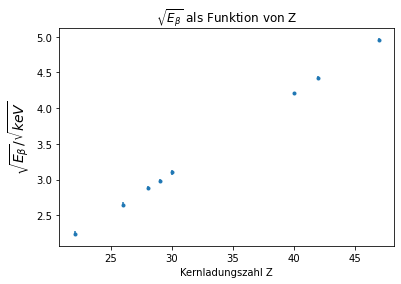

In [7]:
sqrt_K_bet = np.sqrt(mu2)
sqrt_K_bet_err = 0.5 * mu2_err / np.sqrt(mu2)

plt.errorbar(Z, sqrt_K_bet, sqrt_K_bet_err, fmt = ".")
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\beta}/\sqrt{keV}$ ', fontsize = 14)
plt.title(r'$\sqrt{E_\beta}$' + ' als Funktion von Z')
plt.savefig("256-3.jpeg")

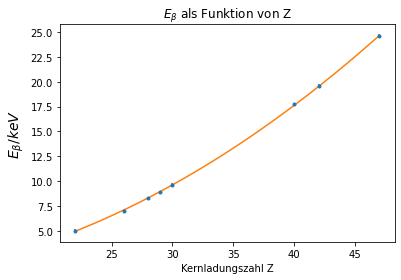

In [8]:
n1 = 1
n2 = 3

popt2, pcov2 = curve_fit(fit_func, Z, mu2, sigma = mu2_err)

plt.errorbar(Z, mu2, yerr = mu2_err, fmt = ".")
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$E_\beta/keV$ ', fontsize = 14)
plt.title(r'$E_\beta$' + ' als Funktion von Z')
plt.plot(zs, fit_func(zs, *popt2))
plt.savefig("256-4.jpeg")

In [9]:
E2_R = popt2[0] * 10**3
E2_R_err = np.sqrt(pcov2[0][0]) * 10**3

print("sig13 = {0:.2f} ± {1:.2f}".format(popt2[1], np.sqrt(pcov2[1][1])))
print("E_R = ({0:.2f} ± {1:.2f})eV".format(E2_R, E2_R_err))
print("Abweichung zum Literaturwert: {0:.1f} sigma".format(np.abs(E2_R - E_R_lit) / E2_R_err))

sig13 = 1.71 ± 0.15
E_R = (13.53 ± 0.12)eV
Abweichung zum Literaturwert: 0.6 sigma


In [10]:
chi2_ = np.sum((fit_func(Z, *popt2) - mu2)**2/ mu2_err**2)
dof = len(mu2) - 2
chi2_red = chi2_ / dof

print("chi^2 = {0:.1f}".format(chi2_))
print("chi^2_red = {0:.1f}".format(chi2_red))

chi^2 = 1.2
chi^2_red = 0.2


In [11]:
prob = round(1 - chi2.cdf(chi2_, dof), 2) * 100
print("Fitwahrscheinlichkeit: {0}%".format(prob))

Fitwahrscheinlichkeit: 98.0%


## Diskussion

Mittels des Mosleyschen Gesetzes konnten wir hier zumindest mittels der $K_\beta$-Strahlung die Rydbergenergie gut bestimmen ($0.6 \sigma$ Abweichung zum Literaturwert). Die Bestimmung desselbigen mittels der $K-\alpha$-Werte war jedoch weniger erfolgreich, das Ergebnis weicht signifikant ($3.4\sigma$) vom Literaturwert ab. Da ersteres Ergebis jedoch keine nennenswerte Abweichung vom Literaturwert besitzt, scheint ein systematischer Fehler am Messgerät aber unwahrscheinlich. 

Wir haben uns in diesem Versuch mit der Methodik der Röntgenspektroskopie gut vertraut machen können, dazu haben wir die verschiedenen Metallplätchen vermessen und den jeweiligen Metallen zugeordet. Abschließend haben wir die zusammensetzungen fünf verschiedener Legierungen bestimmt. Die gefundenen Elemente scheinen plausiebel, es gibt jedoch keine Reiferenz zum Vergleichen. Einige der Proben waren etwas verschmutzt/oxidiert sodass Fehler dadurch prinzipiell nicht ausgeschlossen werden können. 